## EXP_2389_sim_prune_08_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


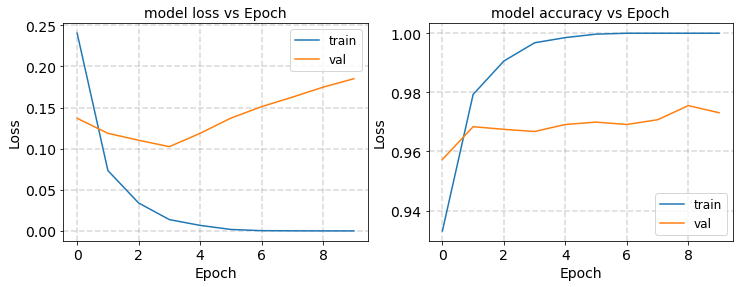

run 1


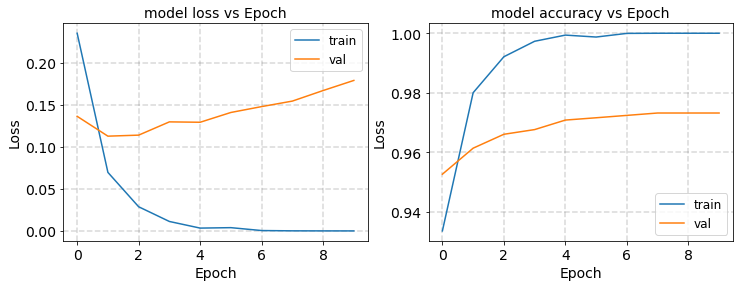

run 2


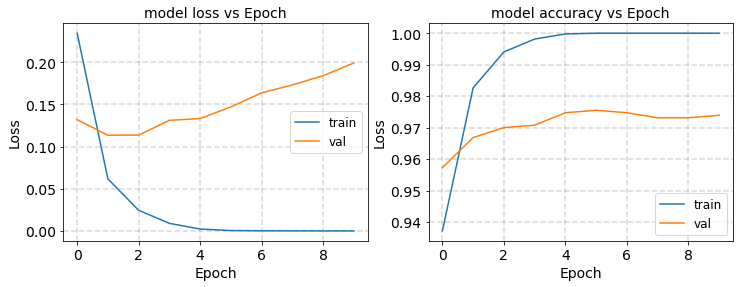

run 3


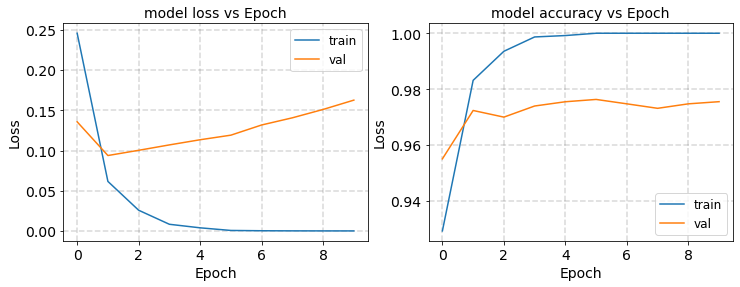

run 4


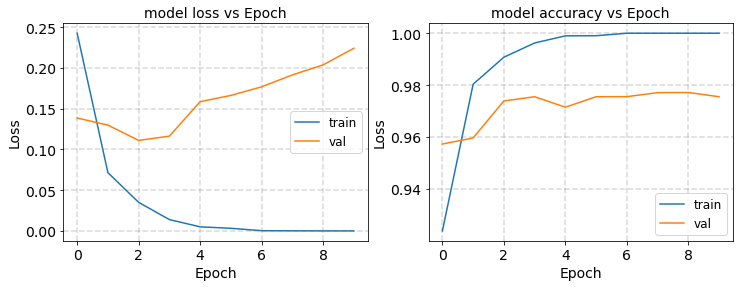

run 5


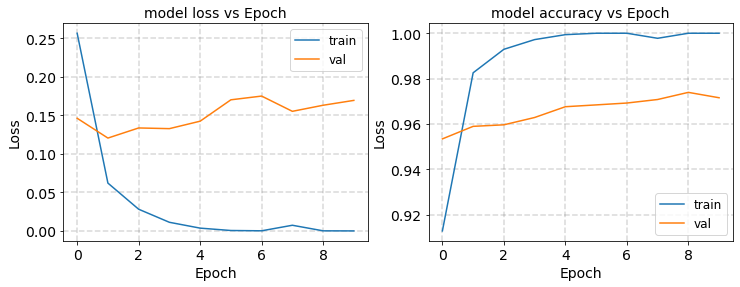

run 6


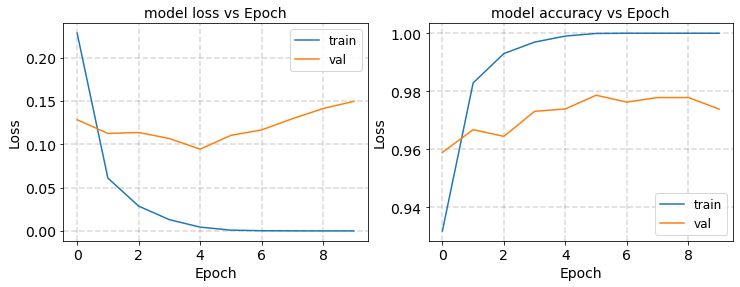

run 7


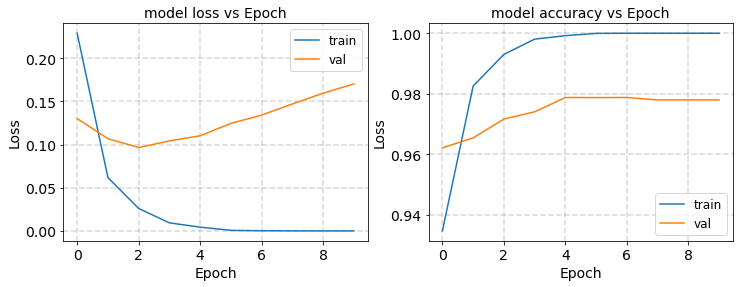

run 8


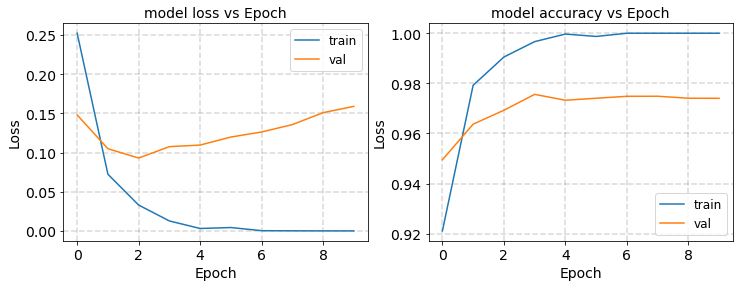

run 9


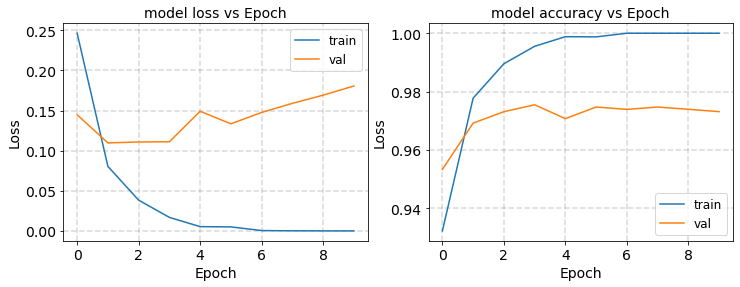

CPU times: user 11min 46s, sys: 1min, total: 12min 47s
Wall time: 12min 17s


In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_sim_prune_08_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    model, history = nc.make_train_simultaneous_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs=10,
                                  verbose=0,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_08_4_64_run0,1.75761,1.68219,0.0423045,0.00945957,100,0,Yes,larger,0.9731
2389_sim_prune_08_4_64_run1,1.79803,1.67368,0.0293092,0.00655374,100,0,Yes,larger,0.973175
2389_sim_prune_08_4_64_run2,1.70186,1.67532,0.0371355,0.00830375,75,0.5,No,larger,0.973925
2389_sim_prune_08_4_64_run3,1.79733,1.67898,0.0443433,0.00991547,100,0,Yes,larger,0.975525
2389_sim_prune_08_4_64_run4,1.74849,1.64747,0.0366388,0.00819268,100,0,Yes,larger,0.97555
2389_sim_prune_08_4_64_run5,1.70632,1.64965,0.036882,0.00824706,95,0.1,No,larger,0.971575
2389_sim_prune_08_4_64_run6,1.70121,1.65605,0.0370412,0.00828266,90,0.2,No,larger,0.973875
2389_sim_prune_08_4_64_run7,1.77435,1.67655,0.0535447,0.011973,100,0,Yes,larger,0.97795
2389_sim_prune_08_4_64_run8,1.72122,1.62342,0.029163,0.00652105,100,0,Yes,larger,0.974025
2389_sim_prune_08_4_64_run9,1.63871,1.69087,0.0396336,0.00886235,15,0.3,No,smaller,0.97315


#### Save dataframe

In [6]:
import pickle

with open( 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_08_4_64_run0,1.75761,1.68219,0.0423045,0.00945957,100,0,Yes,larger,0.9731
2389_sim_prune_08_4_64_run1,1.79803,1.67368,0.0293092,0.00655374,100,0,Yes,larger,0.973175
2389_sim_prune_08_4_64_run2,1.70186,1.67532,0.0371355,0.00830375,75,0.5,No,larger,0.973925
2389_sim_prune_08_4_64_run3,1.79733,1.67898,0.0443433,0.00991547,100,0,Yes,larger,0.975525
2389_sim_prune_08_4_64_run4,1.74849,1.64747,0.0366388,0.00819268,100,0,Yes,larger,0.97555
2389_sim_prune_08_4_64_run5,1.70632,1.64965,0.036882,0.00824706,95,0.1,No,larger,0.971575
2389_sim_prune_08_4_64_run6,1.70121,1.65605,0.0370412,0.00828266,90,0.2,No,larger,0.973875
2389_sim_prune_08_4_64_run7,1.77435,1.67655,0.0535447,0.011973,100,0,Yes,larger,0.97795
2389_sim_prune_08_4_64_run8,1.72122,1.62342,0.029163,0.00652105,100,0,Yes,larger,0.974025
2389_sim_prune_08_4_64_run9,1.63871,1.69087,0.0396336,0.00886235,15,0.3,No,smaller,0.97315


In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       ...,
       [ 0.        , -0.        ,  0.07799008, ..., -0.        ,
        -0.08094434,  0.        ],
       [-0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.06908519]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.7576121623937
1.682185053872741
0.04230449907393609
0.0094595735683398
100.0
0.0
Yes
larger
0.9731000065803528
